## Contents:


1. [Intro_to_dataframes](#Intro_to_dataframes)<br>
2. [Operations_on_Pandas](#Operations_on_Pandas)<br>
3. [Practice_exercise_1](#Practice_exercise_1)<br>
4. [Seoul_dataset](#Seoul_dataset)<br>
5. [Sales_dataset](#Sales_dataset)<br>
5. [Pandas_Udemy](#Pandas_Udemy)<br>
    

<h2 style = "color : Brown"> Data Frame </h2>
<a id='Intro_to_dataframes'>Intro_to_dataframes</a>

In [1]:
# All imports
import numpy as np
import pandas as pd

<h4 style = "color : Sky blue"> Example - 1</h4>  

##### Create a Data Frame cars using raw data stored in a dictionary


In [2]:
cars_per_cap = [809, 731, 588, 18, 200, 70, 45]
country = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
drives_right = [True, False, False, False, True, True, True]

In [3]:
data = {"cars_per_cap": cars_per_cap, "country": country, "drives_right": drives_right}

In [4]:
data

{'cars_per_cap': [809, 731, 588, 18, 200, 70, 45],
 'country': ['United States',
  'Australia',
  'Japan',
  'India',
  'Russia',
  'Morocco',
  'Egypt'],
 'drives_right': [True, False, False, False, True, True, True]}

In [5]:
cars = pd.DataFrame(data)

cars

,cars_per_cap,country,drives_right
0,809,United States,True
1,731,Australia,False
2,588,Japan,False
3,18,India,False
4,200,Russia,True
5,70,Morocco,True
6,45,Egypt,True


In [6]:
type(cars)

pandas.core.frame.DataFrame

<h4 style = "color : Sky blue"> Example - 2 (Reading data from a file)</h4>  

##### Create a Data Frame by importing cars data from cars.csv

In [7]:
# Read a file using pandas

cars_df = pd.read_csv('./pandas_datasets/cars.csv')

cars_df

,USCA,US,United States,809,FALSE
0,ASPAC,AUS,Australia,731.0,True
1,ASPAC,JAP,Japan,588.0,True
2,ASPAC,IN,India,18.0,True
3,ASPAC,RU,Russia,200.0,False
4,LATAM,MOR,Morocco,70.0,False
5,AFR,EG,Egypt,45.0,False
6,EUR,ENG,England,NaN,True


<h4 style = "color : Sky blue"> Example - 3 (Column headers)</h4>  

##### Read file - skip header

In [8]:
cars_df = pd.read_csv('./pandas_datasets/cars.csv', header=None)

cars_df

,0,1,2,3,4
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


##### Assign Headers

In [9]:
# Returns an array of headers

cars_df.columns

Index([0, 1, 2, 3, 4], dtype='int64')

In [10]:
# Rename Headers

cars_df.columns = ['country code', 'region', 'country', 'cars_per_cap', 'drive_right']

In [11]:
cars_df

,country code,region,country,cars_per_cap,drive_right
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


<h4 style = "color : Sky blue"> Example - 4 (Row index/names) </h4>  

##### Read file - skip header and assign first column as index.

In [12]:
# Index is returned by
cars_df.index

RangeIndex(start=0, stop=8, step=1)

In [13]:
# Read file and set 1st column as index
cars_df = pd.read_csv("./pandas_datasets/cars.csv", header= None, index_col=0)

# set the column names
cars_df.columns = ['region', 'country', 'cars_per_cap', 'drive_right']
cars_df

,region,country,cars_per_cap,drive_right
0,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


In [14]:
# Print the new index
cars_df.index


Index(['USCA', 'ASPAC', 'ASPAC', 'ASPAC', 'ASPAC', 'LATAM', 'AFR', 'EUR'], dtype='object', name=0)

##### Rename the Index Name

In [15]:
cars_df.index.name = 'country_code'
cars_df

,region,country,cars_per_cap,drive_right
country_code,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


##### Delete the index name

In [16]:
cars_df.index.name = None
cars_df

,region,country,cars_per_cap,drive_right
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


##### Set Hierarchical index

In [17]:
# Read file and set 1st column as index
cars_df = pd.read_csv("./pandas_datasets/cars.csv", header= None)

# set the column names
cars_df.columns = ['country_code','region','country','cars_per_cap','drives_right']

cars_df.set_index(['region', 'country_code'], inplace=True)


In [18]:
cars_df

,,country,cars_per_cap,drives_right
region,country_code,,,
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


<h4 style = "color : Sky blue"> Example - 5 (Write Data Frame to file) </h4>  

##### Write cars_df to cars_to_csv.csv

In [19]:
cars_df.to_csv('./pandas_datasets/cars_to_csv.csv')

In [20]:
#Marks.csv


import numpy as np
import pandas as pd

# The file is stored at: 'https://media-doselect.s3.amazonaws.com/generic/A08MajL8qN4rq72EpVJbAP1Rw/marks_1.csv'
# Provide your answer below
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/A08MajL8qN4rq72EpVJbAP1Rw/marks_1.csv', header = None, sep = '|')

print(df)

     0        1            2   3   4   5
0    1   Akshay  Mathematics  50  40  80
1    2   Mahima      English  40  33  83
2    3    Vikas  Mathematics  50  42  84
3    4  Abhinav      English  40  31  78
4    5   Mahima      Science  50  40  80
5    6   Akshay      Science  50  49  98
6    7  Abhinav  Mathematics  50  47  94
7    8    Vikas      Science  50  40  80
8    9  Abhinav      Science  50  47  94
9   10    Vikas      English  40  39  98
10  11   Akshay      English  40  35  88
11  12   Mahima  Mathematics  50  43  86


In [21]:
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/A08MajL8qN4rq72EpVJbAP1Rw/marks_1.csv', sep='|',header=None) # Write your answer here
df.columns = ['S.No','Name','Subject','Maximum Marks','Marks Obtained','Percentage']
df=df.set_index('S.No')
df

,Name,Subject,Maximum Marks,Marks Obtained,Percentage
S.No,,,,,
1,Akshay,Mathematics,50,40,80
2,Mahima,English,40,33,83
3,Vikas,Mathematics,50,42,84
4,Abhinav,English,40,31,78
5,Mahima,Science,50,40,80
6,Akshay,Science,50,49,98
7,Abhinav,Mathematics,50,47,94
8,Vikas,Science,50,40,80
9,Abhinav,Science,50,47,94


In [22]:
# Conditional statement in dataframes

import pandas as pd
df = pd.read_csv('https://cdn.upgrad.com/uploads/production/b3467ba4-4e13-44e9-8087-4d7e94cc7586/forestfires.csv')
df_2 = df.loc[(df.area>0)&(df.temp>15)&(df.wind>1),:]
print(df_2.head(20))

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
138  9  9   jul  tue  85.8   48.3  313.4   3.9  18.0  42   2.7   0.0  0.36
139  1  4   sep  tue  91.0  129.5  692.6   7.0  21.7  38   2.2   0.0  0.43
140  2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0  0.47
141  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0  0.55
142  8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0  0.61
143  1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53   5.4   0.0  0.71
144  2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32   5.4   0.0  0.77
145  6  5   aug  thu  95.2  131.7  578.8  10.4  27.4  22   4.0   0.0  0.90
147  8  3   sep  tue  84.4   73.4  671.9   3.2  24.2  28   3.6   0.0  0.96
148  2  2   aug  tue  94.8  108.3  647.1  17.0  17.4  43   6.7   0.0  1.07
149  8  6   sep  thu  93.7   80.9  685.2  17.9  23.7  25   4.5   0.0  1.12
150  6  5   jun  fri  92.5   56.4  433.3   7.1  23.2  39   5.4   0.0  1.19
151  9  9   jul  sun  90.

In [23]:
### Create DataFrames 

#Since a new concept is being introduced, it is beneficial to explore the concept first using simple DataFrames. Once you understand the usage and the capabilities of these concepts, you can think of ways to apply these capabilities as and when needed. 
 

import pandas as pd

df_1 = {"col1":[1,2,3,4], "col2": [5,6,7,8]}
df_2 = {"col1":[11,12,13,14], "col2": [15,16,17,18]}

df1 = pd.DataFrame(df_1)
df2 = pd.DataFrame(df_2)

df1

df2

### Concatenation 

# It is used when you want to stick two dataframes together without any consideration given to matching elements. In contrast, the merge command uses a key to stitch two data frames together. 

# If the shape of the two concatenating dataframes does not match, NaN values are added to make the dimensions uniform. 


pd.concat([df1, df2], axis = 0)

# Axis 0 represents row wise concatenation

# **NOTE**

# - Rows in df2 get added to the df1
# - Intexes of df2 remain the same as they were before the join. 

pd.concat([df1, df2], axis = 1)

# Axis 0 represents column wise concatenation

df1["col3"] = df1["col1"] + df1["col2"]

# After this operation df1 will have 3 columns while df2 has only 2. 

pd.concat([df1, df2], axis = 0)

# Since there is one extra column in df1, the corresponding vales in df2 become `NaN` or null values. 

# ### Arithmetic Operators on DataFrames

# You can perform element wise operations on dataframes as well. These are very similar to operations you performed on NumPy arrays. 

# for example, if you want to add all the elements on `df1` to the correspopnding elements on `df2` you can use the '+' operator. 

df1 + df2 

# As you saw all the elements in `df1` got added to corresponding elements in `df2`
 
# But the `df1` had three columns while `df2` had two. So the operation for the third column is incomplete, that is why you see the null values in the result. This is the most significant difference in using operators in pandas and NumPy; this operation would have thrown an error if it was executed using NumPy arrays.  

# The same result can be achieved by the `add()` method

# df1.add(df2)

# Along with the normal addition this add method also provides additional functionalities. You can read about them [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add.html)

# similar to the '+' operator and the `add()` there are other operators as well 

# - `sub()`: ' - '
# - `mul()`: ' * '
# - `div()`: ' / '
# - `floordiv()`: ' // '
# - `mod()`: ' % ' 
# - `pow()`: ' ** '

# recreating the DataFrames so that the dimentions match. 

df_1 = {"col1":[1,2,3,4], "col2": [5,6,7,8]}
df_2 = {"col1":[11,12,13,14], "col2": [15,16,17,18]}

df1 = pd.DataFrame(df_1)
df2 = pd.DataFrame(df_2)

print (df1)
print (df2)

df2 - df1

df2 ** df1

# recreating the DataFrames so that the dimentions match. 

df_1 = {"col1":[1,2,3,4], "col2": [5,6,7,8]}
df_2 = {"col1":[11,12,13,14]}

df1 = pd.DataFrame(df_1)
df2 = pd.DataFrame(df_2)

print (df1)
print (df2)

df1 + df2

# One of the advantages of pandas DataFrame is that it can hold data of different data types. 
 
# Which leads us to the question What would happen of operators were used on DataFrames which have "non-numerical" data types?

df_1 = {"col1":[1,2,3,4], "col2": [5,6,7,8], "col3": [True,False,False,True], "col4": ["a","b","c","d"] }
df_2 = {"col1":[11,12,13,14], "col2": [15,16,17,18], "col3": [True,False,True,False], "col4": ["e","f","g","h"]}

df1 = pd.DataFrame(df_1)
df2 = pd.DataFrame(df_2)

print (df1)
print (df2)

df1 +df2 

# Something very interesting has happened. 
 
# Pandas was smart enough to recognise the different data types and use the operators accordingly. 
 
# - For int data type, it performed addition 
# - For boolean, it performed OR operation
# - For string, it performed concatenation 

# The below expression throws an error because there is not '-' in strings and pandas cannot figure out what to do. 
# df1 - df2


df_1 = {"col1":[1,2,3,4], "col2": [5,6,7,8], "col3": [True,False,False,True], "col4": ["a","b","c","d"] }
df_2 = {"col1": [True,False,True,False], "col2": ["e","f","g","h"], "col3":[11,12,13,14], "col4": [15,16,17,18] }

df1 = pd.DataFrame(df_1)
df2 = pd.DataFrame(df_2)

print (df1)
print (df2)

# Since the data types of correcponding columns do not match Pandas throws a type error for the below expression
# df1 + df2


# ### Summary

# ##### 1. `Concatenation` : Used when you want to stich to dataframes together without any reguard to the values. 
# a. Even if the shapes do not match the operation is performed. Filling Null values wherever necessary. 
# ##### 2. `operators` : Can perform element wise operations on Pandas DataFrames. 
# a. You can use operators themselves '+' or the function `add()` for the same result.  
# b. If the Shape does not match then null values are added. 
# c. Can work with differnet data types as well, as long as the operation is defined for that data type. 

   col1  col2
0     1     5
1     2     6
2     3     7
3     4     8
   col1  col2
0    11    15
1    12    16
2    13    17
3    14    18
   col1  col2
0     1     5
1     2     6
2     3     7
3     4     8
   col1
0    11
1    12
2    13
3    14
   col1  col2   col3 col4
0     1     5   True    a
1     2     6  False    b
2     3     7  False    c
3     4     8   True    d
   col1  col2   col3 col4
0    11    15   True    e
1    12    16  False    f
2    13    17   True    g
3    14    18  False    h
   col1  col2   col3 col4
0     1     5   True    a
1     2     6  False    b
2     3     7  False    c
3     4     8   True    d
    col1 col2  col3  col4
0   True    e    11    15
1  False    f    12    16
2   True    g    13    17
3  False    h    14    18


<h2 style = "color : Brown"> Operations on Pandas</h2>
<a id='Operations_on_Pandas'>Operations_on_Pandas</a>

<a id='Practice_exercise_1'>Practice_exercise_1</a>

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from IPython.display import display

# Task 1: Reading and Inspection

# Subtask 1.1: Import and read the dataset
movies = pd.read_csv("./pandas_datasets/Movies.csv")

# Display the first few rows of the dataframe
display(movies)

# Check the number of missing values across the columns
print((movies.isnull().sum() > 0).sum())  # Count of columns with missing values
print(movies.shape)  # Shape of the dataframe
print(movies.isnull().sum())  # Missing values per column
print(movies["language"].isnull().sum())  # Missing values in language column
print(movies["genres"].isnull().sum())  # Missing values in genres column
print(movies["num_critic_for_reviews"].isnull().sum())  # Missing values in critic reviews column
print(movies["imdb_score"].isnull().sum())  # Missing values in imdb_score column

# Count movies with English language
print(len(movies[movies["language"] == "English"]))

# Fill missing language values with 'English'
movies["language"].fillna("English", inplace=True)

# Count movies with English language after filling missing values
print(len(movies[movies["language"] == "English"]))

# Subtask 1.2: Inspect the dataframe
# Show the data types of each column
print(movies.dtypes)

# Show the column names
print(movies.columns)

# Question 1: How many rows and columns are present in the dataframe?
# Answer: The shape of the dataframe is (3879, 28)
# Based on the shape information from above, we know the answer is (3879, 28).

# Question 2: How many columns have null values present in them?
# The count of columns with missing values can be calculated using the following code:
print((movies.isnull().sum() > 0).sum())  # This will return the number of columns with null values.

# Task 2: Cleaning the Data

# Subtask 2.1: Drop unnecessary columns
columns_to_drop = [
    "color", "director_facebook_likes", "actor_1_facebook_likes", 
    "actor_2_facebook_likes", "actor_3_facebook_likes", "actor_2_name", 
    "cast_total_facebook_likes", "actor_3_name", "duration", "facenumber_in_poster", 
    "content_rating", "country", "movie_imdb_link", "aspect_ratio", "plot_keywords"
]

# Drop the columns
movies.drop(columns=columns_to_drop, axis=1, inplace=True)

# Display the new shape of the dataframe
print(movies.shape)  # Question 3: The count of columns in the new dataframe will be 15.

# Subtask 2.2: Inspect Null values
# Calculate the percentage of missing values in each column
null_percentages = movies.isnull().mean() * 100
display(null_percentages)

# Question 4: Which column has the highest percentage of null values?
# You can find the column with the highest percentage of null values by sorting the null percentages:
print(null_percentages.idxmax())  # This will give the column name with the highest null percentage

# Subtask 2.3: Fill NaN values
# As discussed, we will fill the missing values in the 'language' column with "English".
movies["language"].fillna("English", inplace=True)

# Question 5: What is the count of movies made in English after replacing the NaN values with English?
print(len(movies[movies["language"] == "English"]))  # Answer: 3674

# Task 3: Data Analysis

# Subtask 3.1: Change the unit of columns
# Convert the 'budget' and 'gross' columns from dollars to millions of dollars.
movies['budget'] = movies['budget'] / 1e6
movies['gross'] = movies['gross'] / 1e6

# Display the updated columns
display(movies[['budget', 'gross']].head())

# Subtask 3.2: Find the movies with the highest profit

# Create a new column called 'profit' as the difference between 'gross' and 'budget'
movies['profit'] = movies['gross'] - movies['budget']

# Sort the dataframe by 'profit' in descending order
movies_sorted_by_profit = movies.sort_values(by='profit', ascending=False)

# Extract the top 10 profiting movies
top10 = movies_sorted_by_profit.head(10)

# Display the top 10 profiting movies
display(top10)

# Question 6: Which movie is ranked 5th from the top in the list obtained?
# Based on the sorted dataframe, this should be:
print(top10.iloc[4]['movie_title'])  # Get the title of the 5th movie

# Subtask 3.3: Find IMDb Top 250

# Filter movies that have a num_voted_users greater than 25,000 and sort by imdb_score
IMDb_Top_250 = movies[movies['num_voted_users'] > 25000].sort_values(by='imdb_score', ascending=False).head(250)

# Add a 'Rank' column to IMDb_Top_250
IMDb_Top_250['Rank'] = range(1, 251)

# Display the IMDb Top 250 dataframe
display(IMDb_Top_250)

# Question 7: Which bucket holds the maximum number of movies from IMDb_Top_250?
# Create buckets based on the 'imdb_score' column
buckets = pd.cut(IMDb_Top_250['imdb_score'], bins=[7.5, 8, 8.5, 9, 9.5, 10])

# Count the number of movies in each bucket
bucket_counts = buckets.value_counts()

# Display the bucket with the maximum count
print(bucket_counts.idxmax())  # This will print the range with the most movies

# Subtask 3.4: Find the critic-favorite and audience-favorite actors

# Create dataframes for Meryl Streep, Leonardo DiCaprio, and Brad Pitt
Meryl_Streep = movies[movies['actor_1_name'] == 'Meryl Streep']
Leo_Caprio = movies[movies['actor_1_name'] == 'Leonardo DiCaprio']
Brad_Pitt = movies[movies['actor_1_name'] == 'Brad Pitt']

# Combine the three dataframes into one
Combined = pd.concat([Meryl_Streep, Leo_Caprio, Brad_Pitt])

# Group by actor and calculate the mean of critic and user reviews
combined_grouped = Combined.groupby('actor_1_name').agg(
    mean_critic_reviews=('num_critic_for_reviews', 'mean'),
    mean_user_reviews=('num_user_for_reviews', 'mean')
)

# Display the result
display(combined_grouped)

# Question 8: Which actor is highest rated among the three actors according to the user reviews?
# Answer: The actor with the highest mean user reviews
highest_rated_user = combined_grouped['mean_user_reviews'].idxmax()
print(highest_rated_user)

# Question 9: Which actor is highest rated among the three actors according to the critics?
# Answer: The actor with the highest mean critic reviews
highest_rated_critic = combined_grouped['mean_critic_reviews'].idxmax()
print(highest_rated_critic)



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3849,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
3850,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
3851,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413


12
(3853, 28)
color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes        6
actor_2_name                  1
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  6
facenumber_in_poster          6
plot_keywords                30
movie_imdb_link               0
num_user_for_reviews          0
language                      4
country                       0
content_rating               48
budget                        0
title_year                    0
actor_2_facebook_likes        1
imdb_score                    0
aspect_ratio                 72
movie_facebook_likes          0
dtype: int64
4
0
1
0
3671
3675
color                         object
director_name         

/tmp/ipykernel_2320/3448015756.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies["language"].fillna("English", inplace=True)


director_name             0.000000
num_critic_for_reviews    0.025954
gross                     0.000000
genres                    0.000000
actor_1_name              0.000000
movie_title               0.000000
num_voted_users           0.000000
num_user_for_reviews      0.000000
language                  0.000000
budget                    0.000000
title_year                0.000000
imdb_score                0.000000
movie_facebook_likes      0.000000
dtype: float64

num_critic_for_reviews
3675


/tmp/ipykernel_2320/3448015756.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies["language"].fillna("English", inplace=True)


,budget,gross
0,237.0,760.505847
1,300.0,309.404152
2,245.0,200.074175
3,250.0,448.130642
4,263.7,73.058679


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
28,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
25,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
2704,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
2748,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
16,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
482,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
230,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
64,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061
419,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.999255


E.T. the Extra-Terrestrial 


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
1795,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.341469,1
3016,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.821952,2
64,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061,3
2543,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.300000,4
325,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.0,2003.0,8.9,16000,283.019252,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Jon Favreau,486.0,318.298180,Action|Adventure|Sci-Fi,Robert Downey Jr.,Iron Man,696338,1055.0,English,140.0,2008.0,7.9,10000,178.298180,246
73,Doug Liman,585.0,100.189501,Action|Adventure|Sci-Fi,Tom Cruise,Edge of Tomorrow,431620,741.0,English,178.0,2014.0,7.9,77000,-77.810499,247
3052,Yash Chopra,29.0,2.921738,Drama|Musical|Romance,Shah Rukh Khan,Veer-Zaara,34449,119.0,Hindi,7.0,2004.0,7.9,2000,-4.078262,248
95,Peter Jackson,645.0,303.001229,Adventure|Fantasy,Aidan Turner,The Hobbit: An Unexpected Journey,637246,1367.0,English,180.0,2012.0,7.9,166000,123.001229,249


(8.0, 8.5]


,mean_critic_reviews,mean_user_reviews
actor_1_name,,
Brad Pitt,245.000000,742.352941
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,181.454545,297.181818


Leonardo DiCaprio
Leonardo DiCaprio


<a id='Seoul_dataset'>Seoul_dataset</a>

In [25]:
# ####  Seoul dataset
# #Question

# # The air quality data for this segment has been divided into three different csv files. 

# # `info.csv` has the data hour by hour data about the concentration of polutants in the air and the status of the intruments. 
# # `item_info` has the data for items and levels of concetration. 
# # `station_info` has the data for measutring stations. 

# # Read in all the three datasets and then print the first five rows.

# # You can download the dataset from kaggle website: https://www.kaggle.com/bappekim/air-pollution-in-seoul

# import pandas as pd

# data = pd.read_csv("./pandas_datasets/Measurement_info.csv", header = 0)
# data

# item = pd.read_csv("./pandas_datasets/Measurement_item_info.csv", header = 0)
# item

# station = pd.read_csv("./pandas_datasets/Measurement_station_info.csv", header = 0)
# station

# #### Question

# # Create a new Dataframe whcih has information about the item code and item name

# sub_item = item[['Item code', 'Item name']]
# sub_item

# #### Question

# # Create a new Dataframe whcih has information about the station code and station name

# sub_station = station[['Station code', 'Station name(district)']]
# sub_station

# ### Question 

# # In the `data` DataFrame add in a column displaying the names of the items. 

# data_i = data.merge(sub_item, on = "Item code", how = "left")
# data_i.head()

# ### Question 

# # In the `data_i` DataFrame add in a column displaying the names of the stations. 

# data_s = data_i.merge(sub_station, on = "Station code", how = "left")
# data_s.head()

# ### Question 

# # In the `data_s` DataFrame drop the columns `Station code` and `Item code`. As these columns have not become redundant. You can find the relevant function in the pandas library [here](https://pandas.pydata.org/docs/reference/index.html). 

# data = data_s.drop(['Station code', 'Item code'], axis = 1)
# data.head()

# ### Question 

# # Given below are the meanings of the values in the `Instrument status`. 

# # - 0: Normal 
# # - 1: Need for calibration 
# # - 2: Abnormal
# # - 4: Power cut off 
# # - 8: Under repair
# # - 9: Abnormal data

# # Using the information given above, add a column in the `data` DataFrame to give the status of the intsruments. Then drop the `Instrument status` column.  

# # Hint: First create a dictionary from the data, then use the same dictionary to create a DataFrame and then merge the DataFrame. with `data`

# status_dict = {"Instrument status": [0,1,2,4,8,9], 
#                "Status": ["Normal", "Need for calibration", "Abnormal", "Power cut off", "Under repair", "Abnormal data"]}
# status_dict

# dictdf = pd.DataFrame(status_dict)
# dictdf

# data = data.merge(dictdf, on = "Instrument status", how = "left")

# data.head()

# data = data.drop(["Instrument status"], axis = 1)

# data.head()

# ### Question 

# # Extract the time series data, that is year, month, date and hour form the `Measurement date` column. Once all the data is extrcted drop the `Measurement date` column. 

# # This operation might take some time as the dataset we are working with is very large. 

# data['Year'] = pd.DatetimeIndex(data['Measurement date']).year
# data['Month'] = pd.DatetimeIndex(data['Measurement date']).month
# data['Date'] = pd.DatetimeIndex(data['Measurement date']).day
# data['Hour'] = pd.DatetimeIndex(data['Measurement date']).hour
# data.head()

# data = data.drop(["Measurement date"], axis =1)

# data.head()

In [26]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


<a id='Sales_dataset'>Sales_dataset</a>

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada')
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_of_Orders  23 non-null     int64  
 1   Profit        23 non-null     float64
 2   Sales         23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB


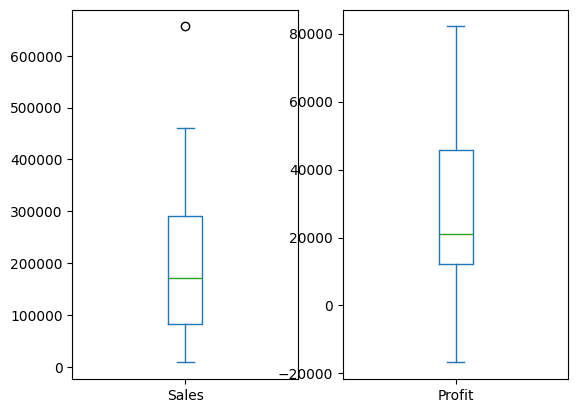

,Market,No_of_Orders,Profit,Sales in Thousands,Profit % of Total
Region,,,,,
Western Africa,Africa,251,NaN,78.00,-1.94
Southern Africa,Africa,85,"11,768.58",51.00,1.77
North Africa,Africa,182,"21,643.08",86.00,3.26
Eastern Africa,Africa,110,"8,013.04",44.00,1.21
Central Africa,Africa,103,"15,606.30",61.00,2.35


In [27]:
from IPython.display import display,HTML

display(HTML('''
<h2 style = "color : Brown">Case Study - Sales Data </h2>
'''))

# All imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Sales and Profit data is read in dataframe "sales"

# Read file 

sales = pd.read_excel('./pandas_datasets/sales.xlsx')
sales

# Read file and set 1st two columns as index
sales = pd.read_excel('./pandas_datasets/sales.xlsx', index_col = [0,1])

sales

display(HTML('''
<h4 style = "color : Sky blue"> Example - 1</h4>  
'''))

##### Display first 3 land last 3 rows of the sales dataframe


sales.head() # Default - returns top 5 rows

sales.head(3)

sales.tail()

sales.tail(3)

display(HTML('''
<h4 style = "color : Sky blue"> Example - 2</h4>   
'''))

##### Display the information about the data stored in data frame


sales.info()

##### Display the statistical information about the data in dataframe

sales.describe()

sales[["Sales", "Profit"]].plot(kind= "box", subplots= True)
plt.show()

sales["Profit"]


##########################################################################################################3
display(HTML('''
<h2 style = "color : Brown">Case Study - Sales Data </h2>
'''))

# All imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Displays pandas float values in 2 decimals
pd.options.display.float_format = '{:,.2f}'.format

sales = pd.read_excel('./pandas_datasets/sales.xlsx')
sales

##### Sales and Profit data is read in dataframe "sales"

# Read file and set 2nd column as index

sales = pd.read_excel('./pandas_datasets/sales.xlsx', index_col = [1])
sales

display(HTML('''
<h4 style = "color : Sky blue"> Example - 1 (Column Indexing)</h4>  
'''))

##### Display Sales Column

sales["Sales"]

sales.Sales

type(sales["Sales"])

##### Display Sales and Profit Column together

sales[["Sales", "Profit"]]

display(HTML('''
<h4 style = "color : Sky blue"> Example - 2 (Row Indexing)</h4>  
'''))

##### Display data for "Southern Asia"

# loc accessor takes row index and column index

sales.loc["Southern Asia"]

##### Display Sales data for "Southern Asia"

sales.loc["Southern Asia", "Sales"]

##### Display data for "Southern Asia"

# iloc accessor takes row number and column number

sales.iloc[6]

sales.iloc[6,3]

display(HTML('''
<h4 style = "color : Sky blue"> Example - 3 (Slicing)</h4>
'''))  

##### Display data for  Market, Sales and Profit

sales.loc[:, ["Market", "Sales", "Profit"]].head()

sales.iloc[:, [0,3,2] ].head()

##### Display data for Western Africa Southern Africa and North Africa

sales.loc[["Western Africa", "Southern Africa", "North Africa"] ,:]

sales.iloc[0:3, :]

##### Display Sales and Profit data for Western Africa Southern Africa and North Africa

sales.loc[["Western Africa", "Southern Africa", "North Africa"] , ["Sales", "Profit"]]

sales.iloc[0:3, 2:4]

display(HTML('''
<h4 style = "color : Sky blue"> Example - 4 (Filtering)</h4> 
''')) 

##### Display Markets with Sales >300000

sales["Sales"] > 300000

sales[ sales["Sales"] > 300000 ]

##### Display the LATAM and Eruopean countries with sales > 250000

sales[  (sales["Market"].isin(["LATAM", "Europe"])) & (sales["Sales"] > 250000)     ]

### Optional Examples 

# The examples given below are good to know but not essential to achieve the objective of this session. You can go through them at your own pace. 

display(HTML('''
<h4 style = "color : Sky blue"> Example - 5 (Transformation)</h4>  
'''))  

# ##### Replace the sales values in the form of thousands

# Context: Some time you might want to modify columns to make them more readable. For instance, the sales column in the given data set has six digits, followed by two decimal places. You might want to make it more readable. You can convert the actual sales number to a number in thousands and make it a round figure. 

# eg. 300000 - 300K

# You can use the .floordiv function to achieve the transformation explained above. You can read more about the .floordiv method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.floordiv.html). 

sales.Sales = sales.Sales.floordiv(1000)

sales.head()

sales.rename(columns={'Sales': 'Sales in Thousands'}, inplace=True)
sales.head()

##### Replace values in Profit percent of total

sales.head()

#sales['Profit']
total_sum = sales.Profit.sum()
sales['Profit % of Total'] = sales.Profit.apply(lambda x: x/total_sum*100)

sales.head()

##### Replace negative Profits with NAN

sales.loc[sales['Profit']<0, 'Profit'] = np.nan
sales.head()

<a id='Pandas_Udemy'>Pandas_Udemy</a><br><br>

In [28]:
import numpy as np
import pandas as pd

labels = ['a','b','c']
my_data = [10,20,30]
arr = np.array(my_data)

d = dict()
for i in range(len(labels)):
    d[labels[i]] = my_data[i]
print(d)

{'a': 10, 'b': 20, 'c': 30}


In [29]:
display(pd.Series(data = my_data))
display(pd.Series(arr, labels))  # i/p: ([10 20 30],['a','b','c'])   ;   o/p: labels,arr
display(pd.Series(labels, arr))  # o/p: arr, labels
display(pd.Series(d))
display(pd.Series(data = labels))
display(pd.Series(data = [sum,print,len]))

a = pd.Series([1,2,3,4],['-1','-2','-3','-4'])
display(a[0],a[1])
b = pd.Series([1,2,3,4],['-1','-5','-3','-4'])
print(a + b)
print(a - b)
print(a ** b)


0    10
1    20
2    30
dtype: int64

a    10
b    20
c    30
dtype: int64

10    a
20    b
30    c
dtype: object

a    10
b    20
c    30
dtype: int64

0    a
1    b
2    c
dtype: object

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

/tmp/ipykernel_2320/4276479389.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(a[0],a[1])


1

2

-1   2.00
-2    NaN
-3   6.00
-4   8.00
-5    NaN
dtype: float64
-1   0.00
-2    NaN
-3   0.00
-4   0.00
-5    NaN
dtype: float64
-1     1.00
-2      NaN
-3    27.00
-4   256.00
-5      NaN
dtype: float64


##### Pandas - Dataframes

In [30]:
from numpy.random import randn

np.random.seed(1)
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])

display(df)
display(type(df))
display(type(df['W']))  # column selection
display((df[0:1]))  #row selection
display(type(df[0:1]))

df['E'] = 2* df['W']
display(df)
df.drop("Z",axis=1,inplace=True)  # default -> axis=0 -> row ; axis=1 -> column
display(df)
display(df.loc['A'])
display(df.iloc[1])  # 2nd row

display(df.loc['A','Y'])  #row, column
#display(df.loc['Y','A'])  #error

display(df.loc[['A','A',"B"],['Y',"X","Y"]]) 
display(df.iloc[[1,2,2],[1,2,2]]) 


,W,X,Y,Z
A,1.62,-0.61,-0.53,-1.07
B,0.87,-2.30,1.74,-0.76
C,0.32,-0.25,1.46,-2.06
D,-0.32,-0.38,1.13,-1.10
E,-0.17,-0.88,0.04,0.58


pandas.core.frame.DataFrame

pandas.core.series.Series

,W,X,Y,Z
A,1.62,-0.61,-0.53,-1.07


pandas.core.frame.DataFrame

,W,X,Y,Z,E
A,1.62,-0.61,-0.53,-1.07,3.25
B,0.87,-2.30,1.74,-0.76,1.73
C,0.32,-0.25,1.46,-2.06,0.64
D,-0.32,-0.38,1.13,-1.10,-0.64
E,-0.17,-0.88,0.04,0.58,-0.34


,W,X,Y,E
A,1.62,-0.61,-0.53,3.25
B,0.87,-2.30,1.74,1.73
C,0.32,-0.25,1.46,0.64
D,-0.32,-0.38,1.13,-0.64
E,-0.17,-0.88,0.04,-0.34


W    1.62
X   -0.61
Y   -0.53
E    3.25
Name: A, dtype: float64

W    0.87
X   -2.30
Y    1.74
E    1.73
Name: B, dtype: float64

-0.5281717522634557

,Y,X,Y
A,-0.53,-0.61,-0.53
A,-0.53,-0.61,-0.53
B,1.74,-2.30,1.74


,X,Y,Y
B,-2.30,1.74,1.74
C,-0.25,1.46,1.46
C,-0.25,1.46,1.46


##### Pandas - Dataframes - 2

In [31]:
display(df > 0)
display(df[df['W']>0][['X','Y']])
display(df[df['W']>0][df['X']<=0])
display(df[(df['W']>0)&(df['X']<=0)])
display(df[(df['W']>0)|(df['X']<=0)])

,W,X,Y,E
A,True,False,False,True
B,True,False,True,True
C,True,False,True,True
D,False,False,True,False
E,False,False,True,False


,X,Y
A,-0.61,-0.53
B,-2.30,1.74
C,-0.25,1.46


/tmp/ipykernel_2320/3068780796.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df[df['W']>0][df['X']<=0])


,W,X,Y,E
A,1.62,-0.61,-0.53,3.25
B,0.87,-2.30,1.74,1.73
C,0.32,-0.25,1.46,0.64


,W,X,Y,E
A,1.62,-0.61,-0.53,3.25
B,0.87,-2.30,1.74,1.73
C,0.32,-0.25,1.46,0.64


,W,X,Y,E
A,1.62,-0.61,-0.53,3.25
B,0.87,-2.30,1.74,1.73
C,0.32,-0.25,1.46,0.64
D,-0.32,-0.38,1.13,-0.64
E,-0.17,-0.88,0.04,-0.34


In [32]:
df.reset_index(inplace=False)
#df.set_index('index',inplace=True)
display(df)

,W,X,Y,E
A,1.62,-0.61,-0.53,3.25
B,0.87,-2.30,1.74,1.73
C,0.32,-0.25,1.46,0.64
D,-0.32,-0.38,1.13,-0.64
E,-0.17,-0.88,0.04,-0.34


##### Pandas - Dataframes - 3

In [33]:
outside = ['g1','g1','g1','g2','g2','g2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [34]:
df = pd.DataFrame(randn(6,2),hier_index,['A','B'])
display(df)
display(df.loc['g1'])
display(df.loc['g1'].loc[1])

A     B
g1 1 -1.10  1.14
   2  0.90  0.50
   3  0.90 -0.68
g2 1 -0.12 -0.94
   2 -0.27  0.53
   3 -0.69 -0.40

,A,B
1,-1.10,1.14
2,0.90,0.50
3,0.90,-0.68


A   -1.10
B    1.14
Name: 1, dtype: float64

In [35]:
df.index.names = ['Groups','Num']
display(df)
display(df.loc['g2'])
display(df.xs('g2'))
display(df.xs(1,level="Num"))
display(df.xs(2,level="Num"))

A     B
Groups Num            
g1     1   -1.10  1.14
       2    0.90  0.50
       3    0.90 -0.68
g2     1   -0.12 -0.94
       2   -0.27  0.53
       3   -0.69 -0.40

,A,B
Num,,
1,-0.12,-0.94
2,-0.27,0.53
3,-0.69,-0.40


,A,B
Num,,
1,-0.12,-0.94
2,-0.27,0.53
3,-0.69,-0.40


,A,B
Groups,,
g1,-1.10,1.14
g2,-0.12,-0.94


,A,B
Groups,,
g1,0.90,0.50
g2,-0.27,0.53


##### Pandas - Missing data

In [36]:
d = {
    'A':[1,2,np.nan],
    'B':[5,np.nan,np.nan],
    'C':[1,2,3]
}
df = pd.DataFrame(d)  #shift + tab to get info about commands
display(df)
display(df.dropna())  # row-wise by default (axis=0)
#display(df)
df.dropna(axis=1)
display(df.dropna(thresh=2))

,A,B,C
0,1.00,5.00,1
1,2.00,NaN,2
2,NaN,NaN,3


,A,B,C
0,1.00,5.00,1


,A,B,C
0,1.00,5.00,1
1,2.00,NaN,2


In [37]:
display(df.fillna('blank'))
display(df.fillna(value=df['A'].mean()))
display(df.fillna(value=df['A'].median()))
display(df.fillna(value=df['A'].mode()))

,A,B,C
0,1.00,5.00,1
1,2.00,blank,2
2,blank,blank,3


,A,B,C
0,1.00,5.00,1
1,2.00,1.50,2
2,1.50,1.50,3


,A,B,C
0,1.00,5.00,1
1,2.00,1.50,2
2,1.50,1.50,3


,A,B,C
0,1.00,5.00,1
1,2.00,NaN,2
2,NaN,NaN,3


In [38]:
data = {
    'Company':['google','google','microsoft','microsoft','rakuten','rakuten'],
    'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
    'Sales':[200,120,340,124,243,350]
}

df = pd.DataFrame(data)
display(df)

byComp = df.groupby('Company') # <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1291184f0>
display(byComp.sum())
display(byComp.sum().loc['rakuten'])
display(df.groupby('Company').min())

,Company,Person,Sales
0,google,Sam,200
1,google,Charlie,120
2,microsoft,Amy,340
3,microsoft,Vanessa,124
4,rakuten,Carl,243
5,rakuten,Sarah,350


,Person,Sales
Company,,
google,SamCharlie,320
microsoft,AmyVanessa,464
rakuten,CarlSarah,593


Person    CarlSarah
Sales           593
Name: rakuten, dtype: object

,Person,Sales
Company,,
google,Charlie,120
microsoft,Amy,124
rakuten,Carl,243


In [39]:
display(df.groupby('Company').describe())

Sales                                                 
          count   mean    std    min    25%    50%    75%    max
Company                                                         
google     2.00 160.00  56.57 120.00 140.00 160.00 180.00 200.00
microsoft  2.00 232.00 152.74 124.00 178.00 232.00 286.00 340.00
rakuten    2.00 296.50  75.66 243.00 269.75 296.50 323.25 350.00

In [40]:
from datetime import datetime
import pytz

# Define the IST timezone
ist = pytz.timezone('Asia/Kolkata')

# Get the current time in UTC
utc_now = datetime.now(pytz.utc)

# Convert the current time to IST
ist_now = utc_now.astimezone(ist)

# Print the current time in IST
print("Current Time in IST:", ist_now.strftime('%Y-%m-%d %H:%M:%S'))

Current Time in IST: 2025-02-11 19:54:13
